# EDA - UNIVARIATE ANALYSIS- PYTHON 

Reference Link : https://www.kaggle.com/code/lonewolf95/eda-101-univariate-analysis-for-beginners/notebook

## Objective : To Demonstarte structured format of Performing EDA

### Overview:
1.Introduction to problem statement

2.Hypothesis generation with respect to problem statement

3.Introduction to dataset

4.Importing dataset and first impressions

5.Variable Identification and Typecasting

6.Univariate Analysis : Numerical Variables

7.Univariate Analysis : Categorical Variables

8.Univariate Analysis : Missing Values

9.Univariate Analysis : Oulier Values

10.Summary of Univariate Analysis

### 1. Introduction to problem statement:
A Bank wants to take care of customer retention for their product; savings accounts. The bank wants you to identify customers likely to churn balances below the minimum balance. You have the customers information such as age, gender, demographics along with their transactions with the bank. Your task as a data scientist would be to predict the propensity to churn for each customer.

### 2. Hypothesis Generation for the problem statement:
Hypothesis generation is about preparing an exhaustive list of questions or possibilities which directly or indirectly affect the problem statement or the target variablw. It is a very important step as it prevents us from going down for a wild goose chase during EDA. It narrows down the process of performing EDA to the most essential aspects.

This step is performed before looking/gathering dataset

To generate hypothesis, we require the following:

1.Common Sense or Rationality

2.Domain knowledge if possible

3.Communication with domain experts

4.Given below are the hypothesis we will be working with in this EDA

On basis of Demographics

1.Are females less likely to churn than males?

2.Are young customers more likely to churn?

3.Are customers in the lower income bracket more likely to churn?

4.Are customers with dependent(s) less likely to churn?

5.Customers with an average family size less than 4 are more likely to churn?

On the basis of customer behaviour

1.Are vintage customers less likely to churn?

2.Are customers with higher average balance less likely to churn?

3.Are customers dropping monthly balance highly likely to churn?

4.Are customers with no transaction is the last 3 months more likely to churn?

5.Are customers who have large withdrawal amounts in the last month more likely to churn?

6.Are customers who have large withdrawal amounts in the last quarter more likely to churn?

7.Customers who have not engaged with the bank in the last quarter are more likely to churn?

### 3. Introduction to Dataset
There are multiple variables in the dataset which can be cleanly divided in 3 categories:

Demographic information about customers
customer_id - Customer id

vintage - Vintage of the customer with the bank in number of days

age - Age of customer

gender - Gender of customer

dependents - Number of dependents

occupation - Occupation of the customer

city - City of customer (anonymised)

Bank Related Information for customers
customer_nw_category - Net worth of customer (3:Low 2:Medium 1:High)

branch_code - Branch Code for customer account

days_since_last_transaction - No of Days Since Last Credit in Last 1 year

Transactional Information
current_balance - Balance as of today

previous_month_end_balance - End of Month Balance of previous month

average_monthly_balance_prevQ - Average monthly balances (AMB) in Previous Quarter

average_monthly_balance_prevQ2 - Average monthly balances (AMB) in previous to previous quarter

percent_change_credits - Percent Change in Credits between last 2 quarters

current_month_credit - Total Credit Amount current month

previous_month_credit - Total Credit Amount previous month

current_month_debit - Total Debit Amount current month

previous_month_debit - Total Debit Amount previous month

current_month_balance - Average Balance of current month

previous_month_balance - Average Balance of previous month

churn - Average balance of customer falls below minimum balance in the next quarter (1/0)

### 4. Reading Files into Python And first Impressions

In [2]:
from warnings import warn

In [6]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')

In [8]:
## Loading Dataset
df = pd.read_csv("C:\\Users\\Indian\\Desktop\\Projects\\UNIVARIATE ANALYSIS\\Banking_churn_prediction.csv")

In [9]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [43]:
#last 5 instances using "tail()" function
df.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT
28381,30301,1175,18,Male,0.0,student,1232.0,2,474,2107.05,...,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1,2019-11-02


In [44]:
## --> This verifies that the data was imported successfully (no abnormal absurd entries).

In [45]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
df.shape
## ---> Data is fairly small with 28K rows observations, although the number of columns are 21

(28382, 21)

In [46]:
#Printing all the columns present in data
df.columns
## ---> This verifies that the all the variables are present as claimed in the data dictionary

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [47]:
# A closer look at the data types present in the data
df.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                         float64
occupation                          object
city                               float64
customer_nw_category                 int64
branch_code                          int64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

### 5. Variable Identification and Typecasting
This is one of the most important steps, Why?

Because pandas is not very good when it comes to recognising the datatype of theimported variables. So in this section, we will be analysing the datatypes of each variables and converting them to respective types.

In [48]:
# A closer look at the data types present in the data
df.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                         float64
occupation                          object
city                               float64
customer_nw_category                 int64
branch_code                          int64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

#### Summary:

Customer id are a unique number assigned to customers. It is Okay as Integer.

branch code again represents different branches, therefore it should be convereted to category.

Age and Vintage are also numbers and hence we are okay with them as integers.

customer_networth_category is supposed to be an category, should be converted to category.

churn : 1 represents the churn and 0 represents not churn. However, there is no comparison between these two categories. This needs to be converted to category datatype.

In [10]:
# converting churn to category
df['churn'] = df['churn'].astype('category')## Nature is changing nueric to categorical
print(df['churn'])

0        0
1        0
2        0
3        1
4        1
        ..
28377    0
28378    0
28379    1
28380    0
28381    1
Name: churn, Length: 28382, dtype: category
Categories (2, int64): [0, 1]


In [23]:
df['branch_code'] = df['branch_code'].astype('category')
df['customer_nw_category'] = df['customer_nw_category'].astype('category')
df.dtypes[df.dtypes == 'int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

In [29]:
# Identifying variables with float datatype
df.dtypes[df.dtypes == 'float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

#### Summary:

dependents is expected to be a whole number. Should be changed to integer type

city variable is also a unique code of a city represented by some interger number. Should be converted to Category type

Rest of the variables like credit, balance and debit are best represented by the float variables.

In [30]:
# converting "dependents" and "city" to their respective types
df['dependents'] = df['dependents'].astype('Int64')
df['city'] = df['city'].astype('category')

# checking
df[['dependents','city']].dtypes

dependents       Int64
city          category
dtype: object

In [31]:
df.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                           Int64
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
last_transaction                    object
dtype: object

In [32]:
# Manually checking object types
df[['gender','occupation','last_transaction']].head(7)

,gender,occupation,last_transaction
0,Male,self_employed,2019-05-21
1,Male,self_employed,2019-11-01
2,Male,salaried,NaT
3,NaN,self_employed,2019-08-06
4,Male,self_employed,2019-11-03
5,Female,self_employed,2019-11-01
6,Male,retired,2019-09-24


In [49]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(df['last_transaction'])
date

DatetimeIndex(['2019-05-21', '2019-11-01',        'NaT', '2019-08-06',
               '2019-11-03', '2019-11-01', '2019-09-24', '2019-07-12',
               '2019-12-12', '2019-12-31',
               ...
               '2019-12-06', '2019-12-28', '2019-02-28', '2019-11-04',
                      'NaT', '2019-10-22', '2019-12-17', '2019-12-31',
                      'NaT', '2019-11-02'],
              dtype='datetime64[ns]', name='last_transaction', length=28382, freq=None)

In [50]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
df['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
df['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
df['moy_ls_tran'] = date.month

# day of week when last transaction was done
df['dow_ls_tran'] = date.dayofweek

In [35]:
# checking new extracted columns using datetime
df[['last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

,last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,2019-05-21,141.0,21.0,5.0,1.0
1,2019-11-01,305.0,44.0,11.0,4.0
2,NaT,NaN,NaN,NaN,NaN
3,2019-08-06,218.0,32.0,8.0,1.0
4,2019-11-03,307.0,44.0,11.0,6.0


#### The first column is the complete date of the last transaction which was done by any given customer.

The next columns represent the day of year, week of year, month of year, day of week when the last transaction was done.

Breaking down the date variable into these granular information will help us in understand when the last transaction was done from different perspectives. Now that we have extracted the essentials from the last_transaction variables, we will drop it from the dataset.

In [42]:
# Removing the original datetime column
df = df.drop(columns = ['last_transaction'])
df.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                           Int64
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran

### 6. Univariate Analysis: Numerical Variables¶
When dealing with numerical variables, we have to check their properties like:

Mean

Median

Standard Deviation

Kurtosis/skewness

distribution/range

In [15]:
# Numerical datatypes
df.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                        float64
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

#### Now considering that we have 18 numerical variables and 5 properties associated with each, Performing univariate analysis can be tiresome. For this reasonn, it is always wise to form a cluster/group of variables which are similar to each other in nature. The variables can be grouped in many different ways.

In this EDA I am grouping variable into 5 groups:

customer_details

current_month

previous_month

previous_quarters

transaction_date

In [40]:
# seggregating variables into groups
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

#### Now to visualise the variable groups at once with all the necessary descriptives, let's define a universal/reusable function to do that.

In [12]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(df, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = df[i].min()
    maxi = df[i].max()
    ran = df[i].max()-df[i].min()
    mean = df[i].mean()
    median = df[i].median()
    st_dev = df[i].std()
    skew = df[i].skew()
    kurt = df[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(df[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
##Now that the stage is set, let's perform the univariate analysis and learn what we can.

### Customer Information

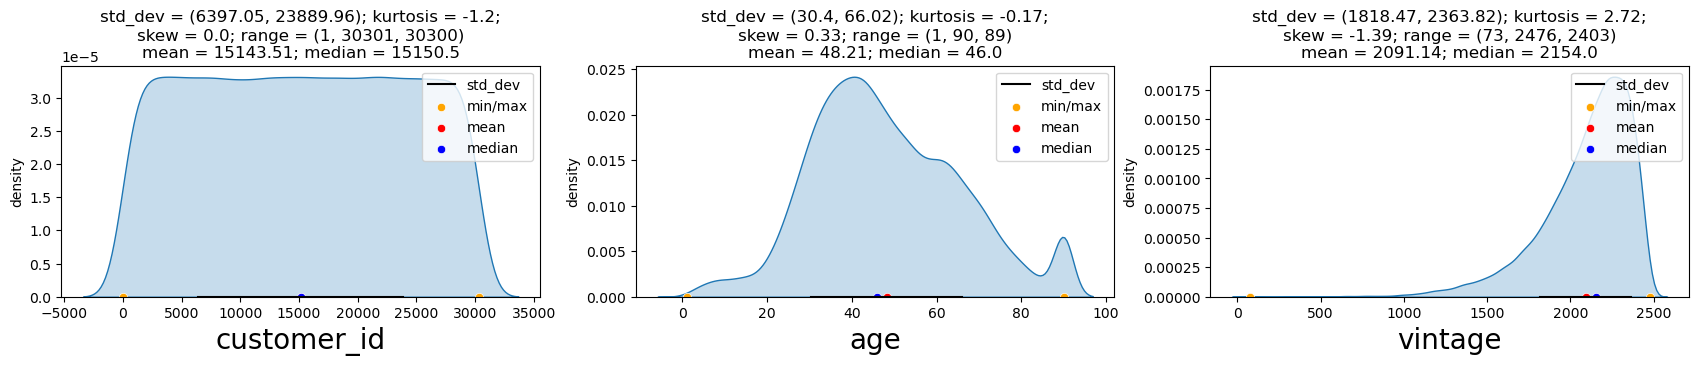

In [16]:
UVA_numeric(df,customer_details)

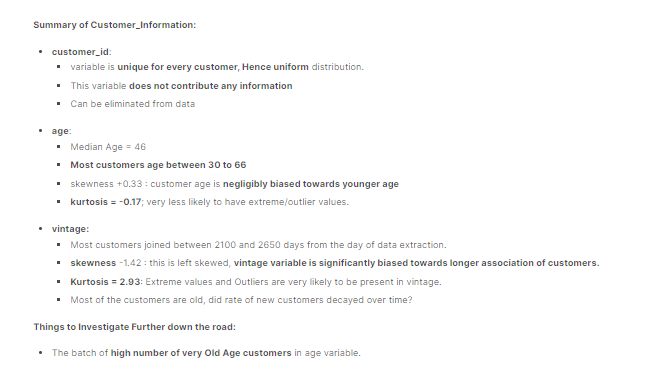

#### Current Month

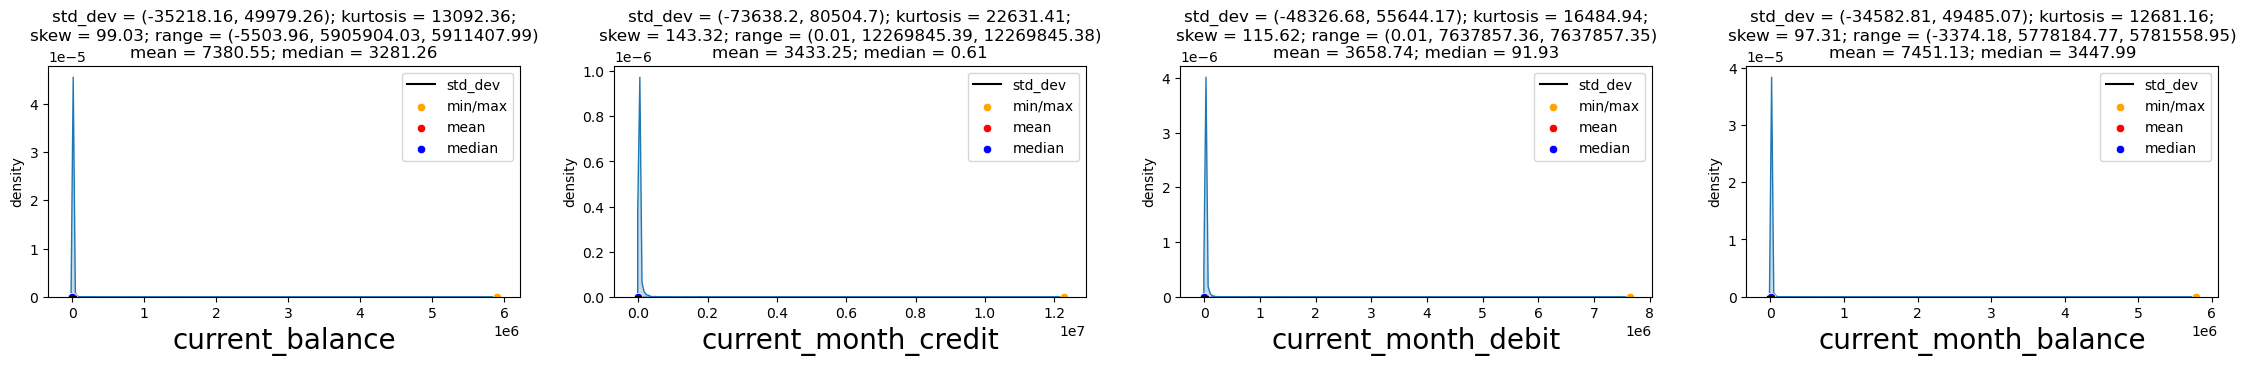

In [17]:
UVA_numeric(df,current_month)

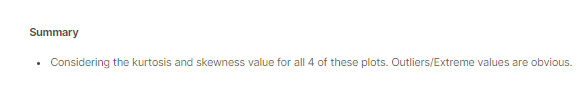
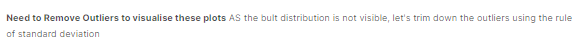

##### Empirical Rule of Statistics
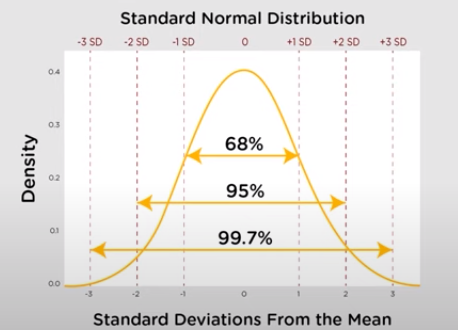

In [19]:
# standard deviation factor
factor = 2

# copying current_month
cm_data = df[current_month]

# filtering using standard deviation (not considering obseravtions > mean + 3* standard deviation)
cm_data = cm_data[cm_data['current_balance'] < cm_data['current_balance'].mean() + factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < cm_data['current_month_credit'].mean() + factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < cm_data['current_month_debit'].mean() + factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < cm_data['current_month_balance'].mean() + factor*cm_data['current_month_balance'].std()]

# checking how many points removed
len(df), len(cm_data)

(28382, 26563)

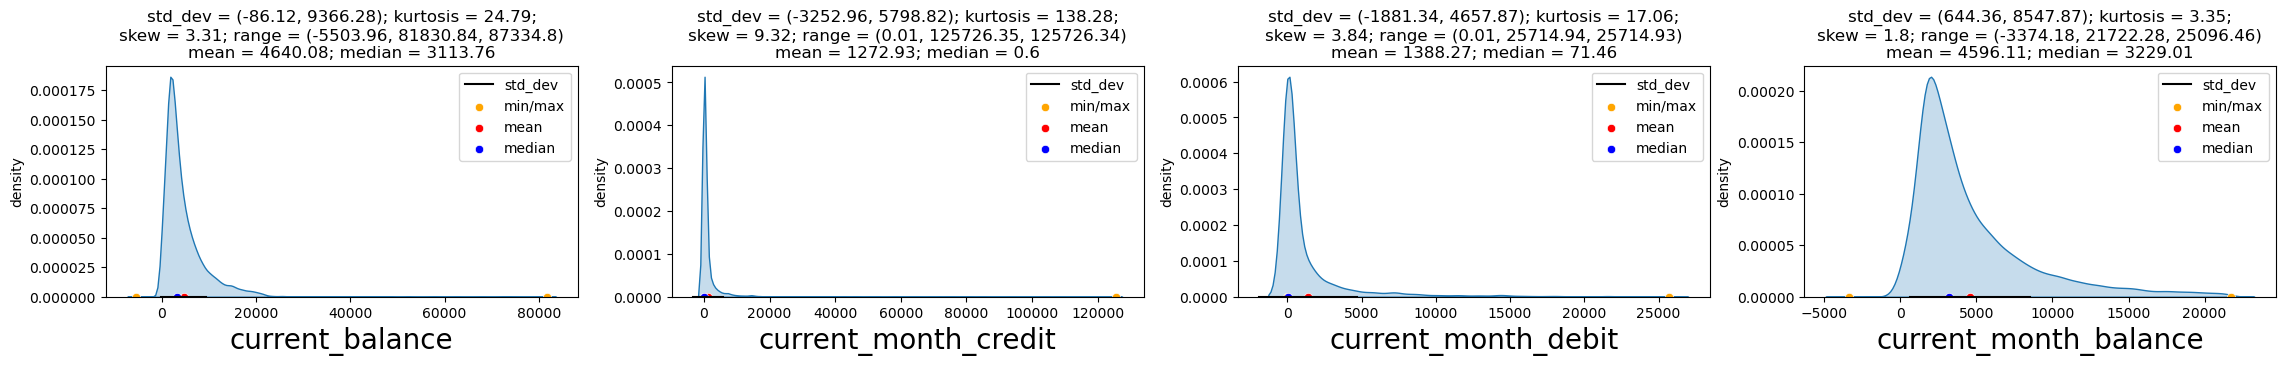

In [20]:
UVA_numeric(cm_data,current_month)

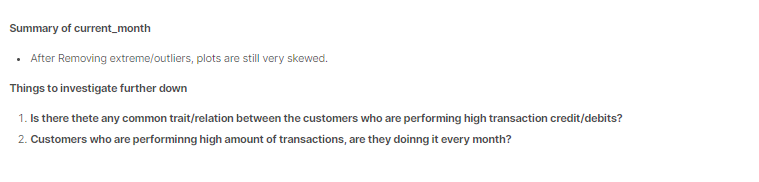

### Previous Month

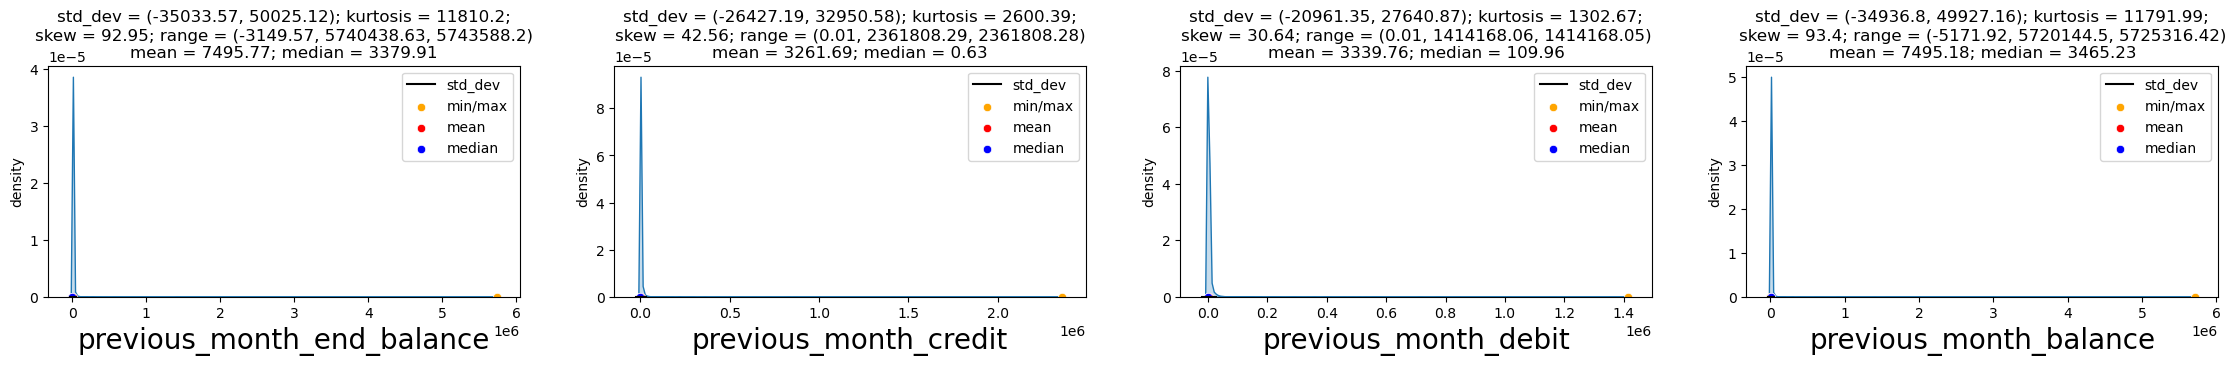

In [21]:
UVA_numeric(df,previous_month)

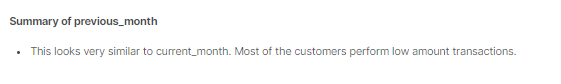

### Previous Quarters

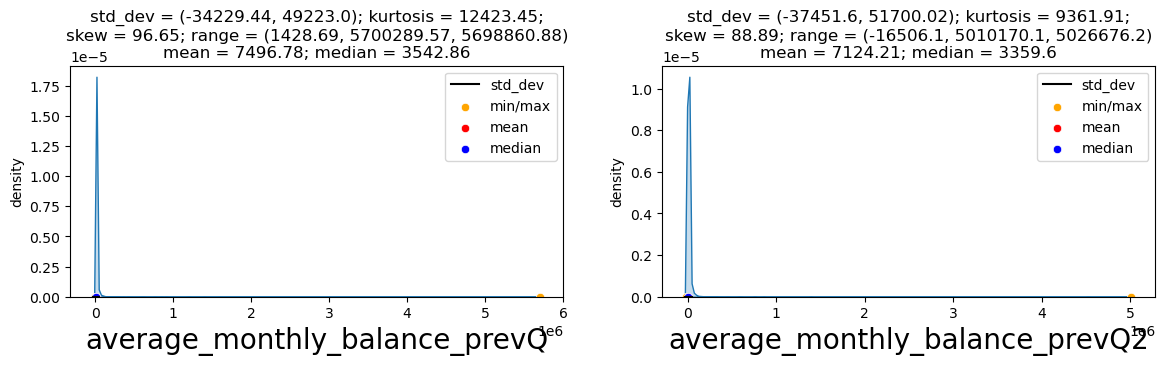

In [22]:
UVA_numeric(df,previous_quarters)

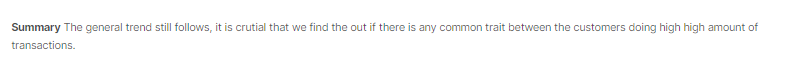

### Transcation Date

In [42]:
UVA_numeric(df,transaction_date)

KeyError: 'doy_ls_tran'

<Figure size 2800x300 with 0 Axes>

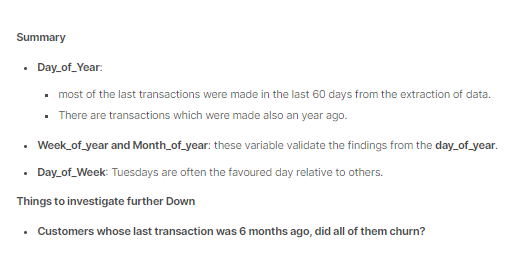

### 7. Univariate Analysis : Categorical Variables

In [58]:
df.select_dtypes(exclude=['int64','float64','Int64']).dtypes

gender                    object
occupation                object
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

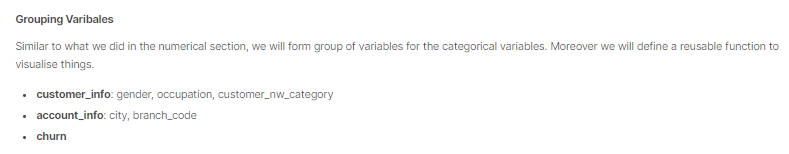

In [25]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(df, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = df[i].value_counts(normalize = True)
    n_uni = df[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

### Customer Info 

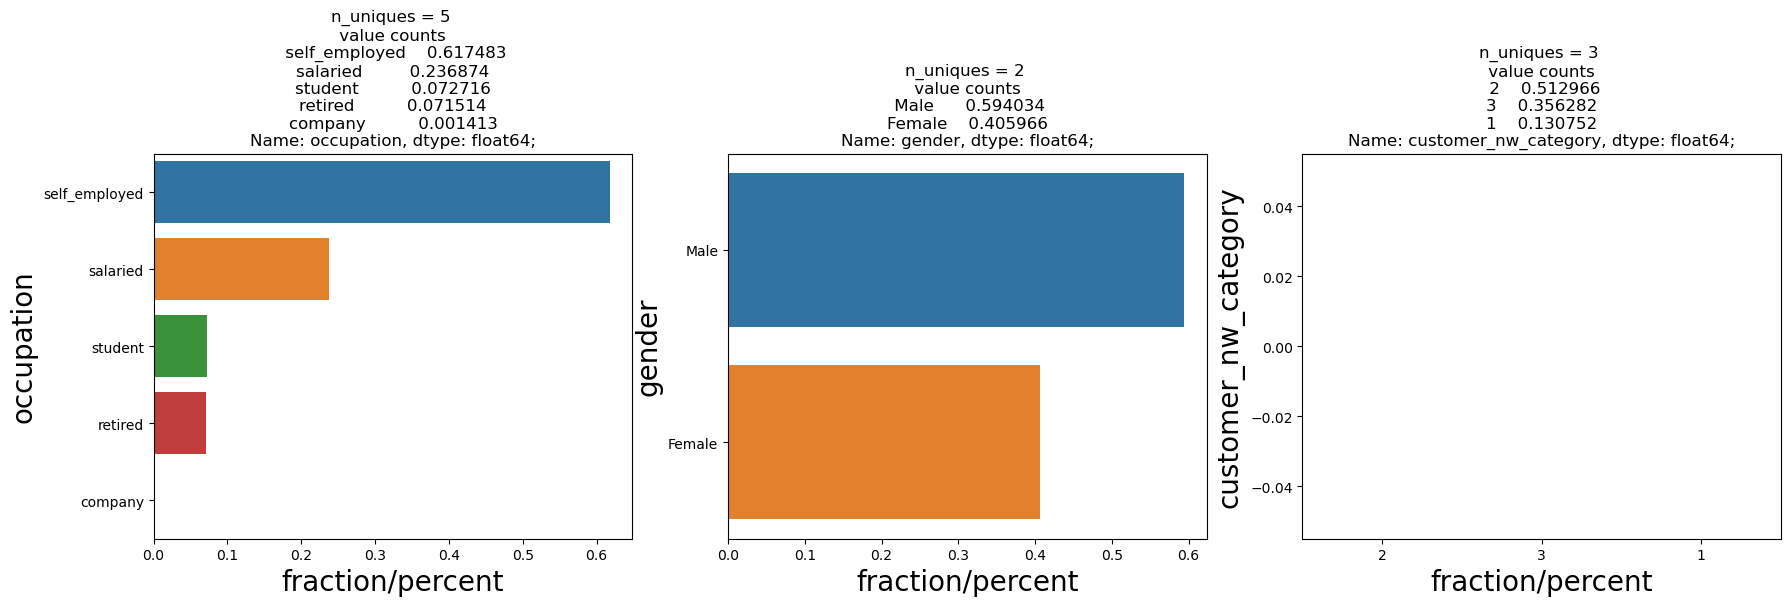

In [26]:
UVA_category(df, ['occupation', 'gender', 'customer_nw_category'])


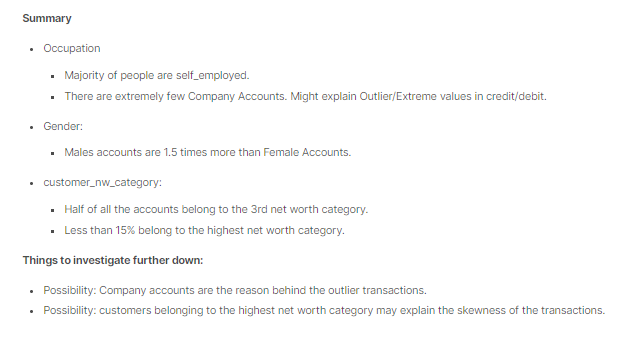

### Account Info

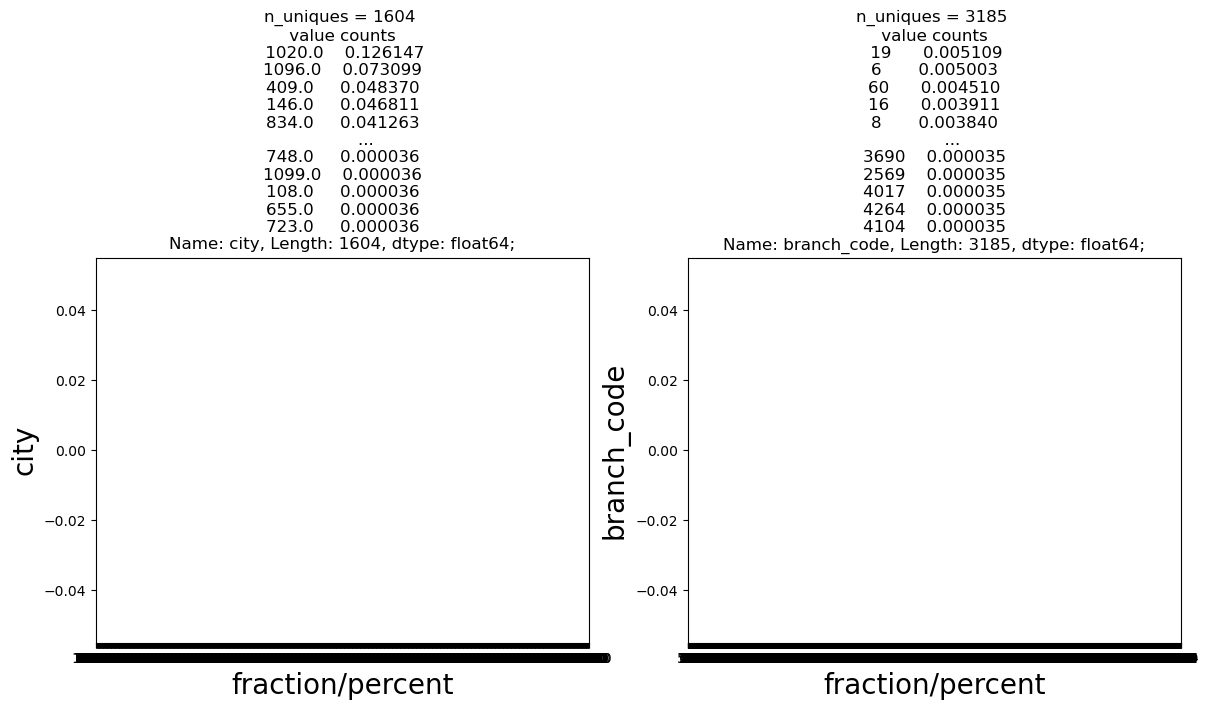

In [27]:
UVA_category(df, ['city', 'branch_code'])

(0.0, 0.02)

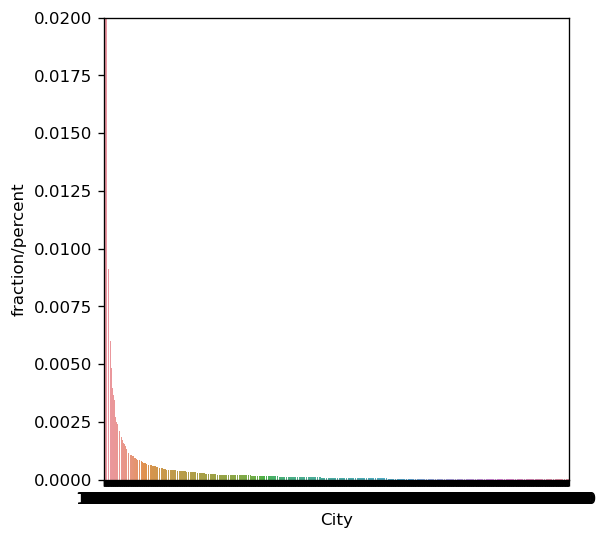

In [28]:
#Plotting "city"
plt.figure(figsize = (5,5), dpi = 120)
city_count = df['city'].value_counts(normalize=True)
sns.barplot(city_count.index, city_count , order = city_count.index)
plt.xlabel('City')
plt.ylabel('fraction/percent')
plt.ylim(0,0.02)

Text(0, 0.5, 'fraction/percent')

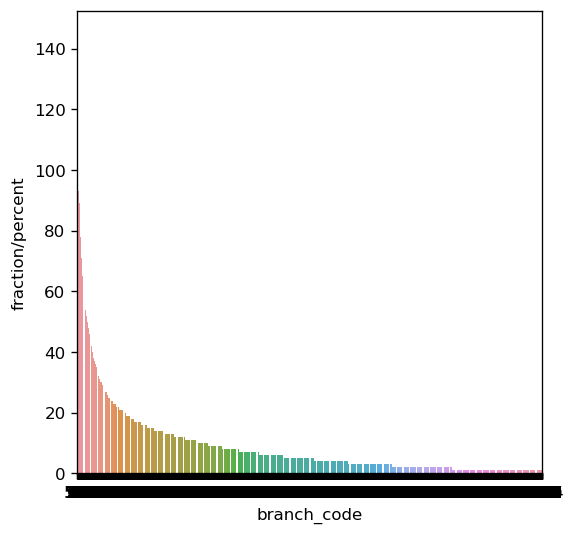

In [29]:
#Plotting "branch_code"
plt.figure(figsize = (5,5), dpi = 120)
branch_count = df['branch_code'].value_counts()
sns.barplot(branch_count.index, branch_count , order = branch_count.index)
plt.xlabel('branch_code')
plt.ylabel('fraction/percent')
#plt.ylim(0,0.02)

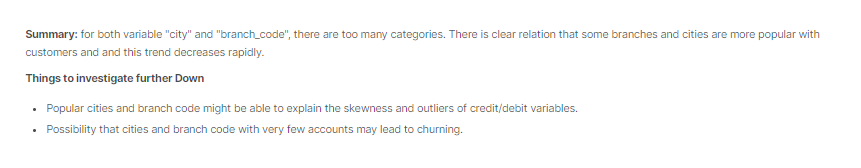

### Churn

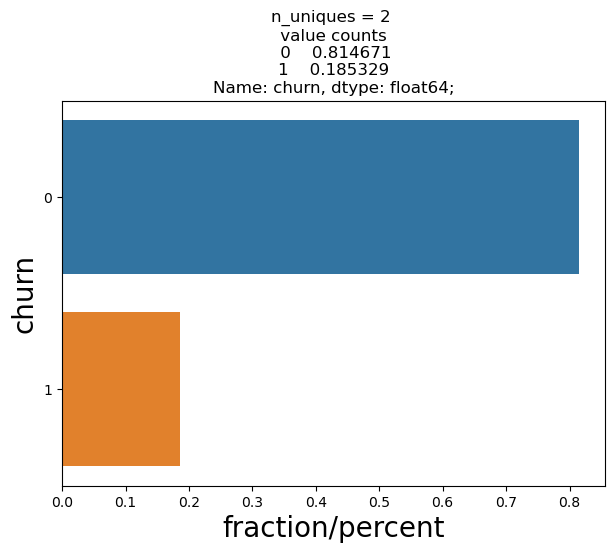

In [30]:
UVA_category(df, ['churn'])

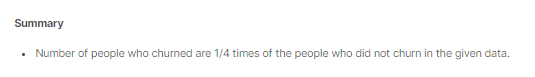

## 8. Univariate: Missing Values

Missing values could be due to several reasons.

Human error

Privacy issues etc

In [31]:
# finding number of missing values in every variable
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

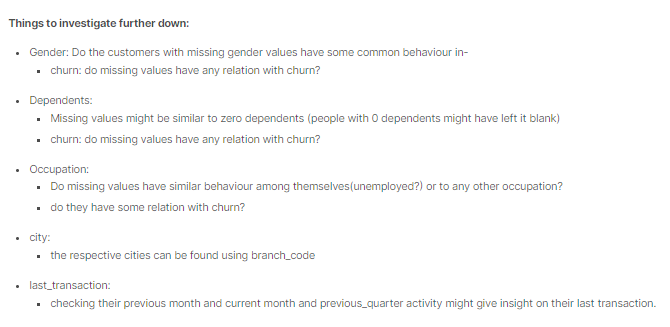

## 9. Univariate Analysis: Outliers

We suspected outliers in current_month and previous_month variable groups. We will verify that using box plots.

In [32]:
# custom function for easy outlier analysis

def UVA_outlier(df, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = df[i].quantile(0.25)
    quant75 = df[i].quantile(0.75)
    IQR = quant75 - quant25
    med = df[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(df[i][df[i]>whis_high])
    outlier_low = len(df[i][df[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(df[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = df[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

### current_month and previous_month

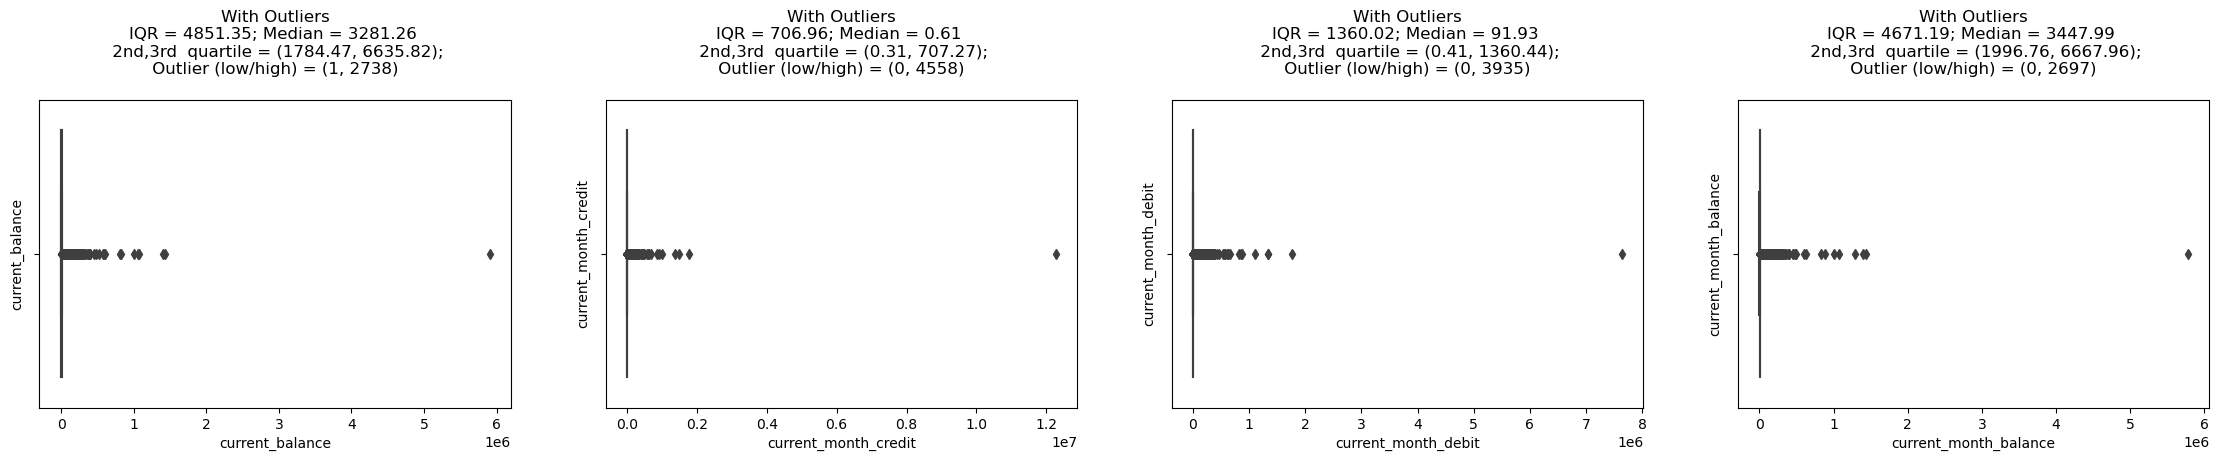

In [33]:
UVA_outlier(df, current_month,)

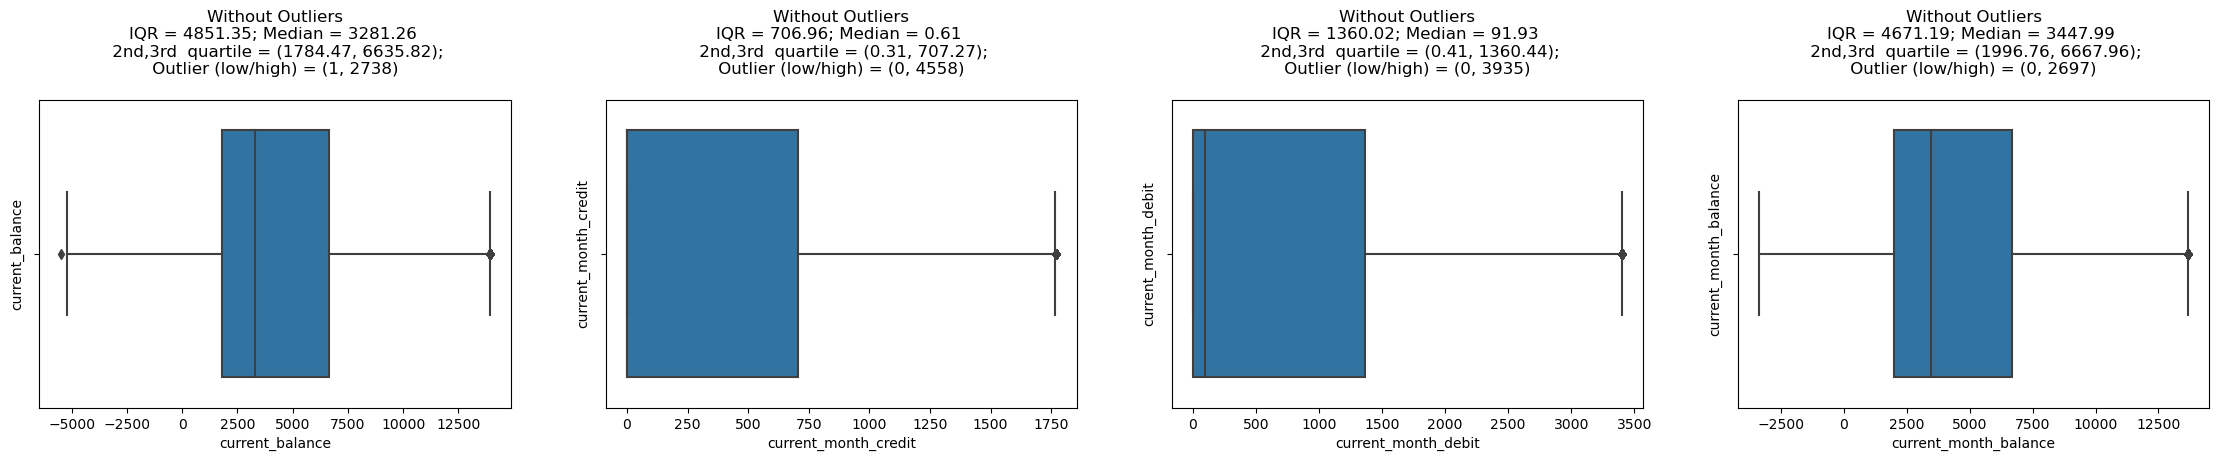

In [34]:
UVA_outlier(df, current_month, include_outlier=False)


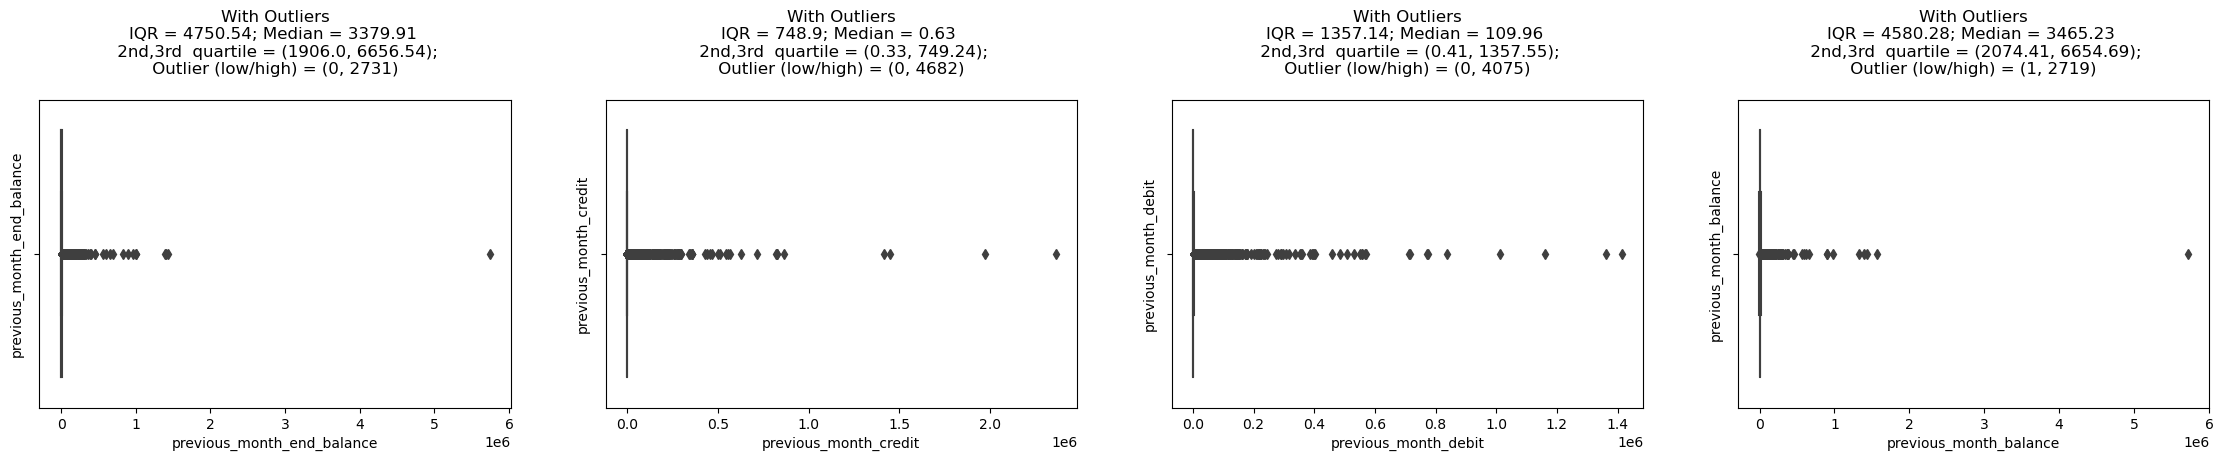

In [35]:
UVA_outlier(df, previous_month)

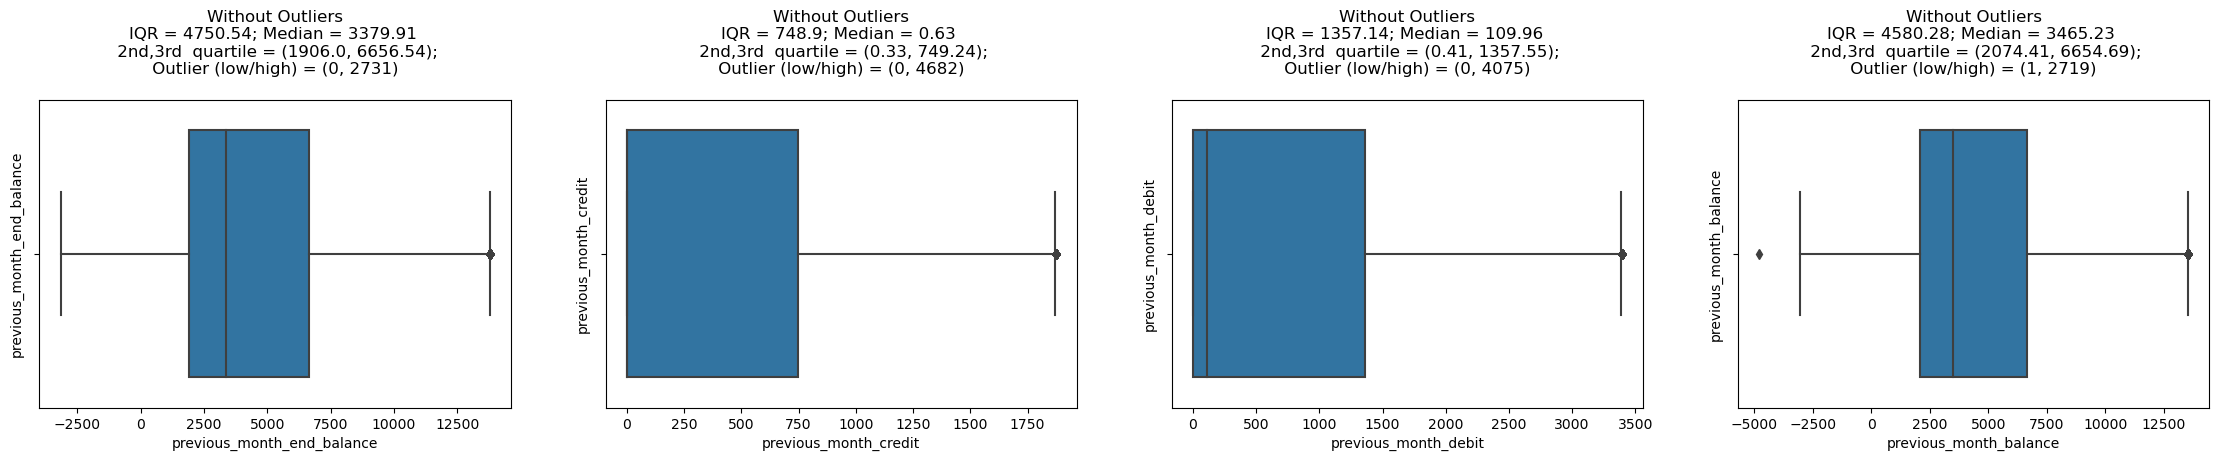

In [36]:
UVA_outlier(df, previous_month, include_outlier=False)

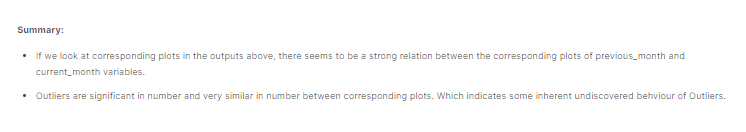

### Previous Quarters

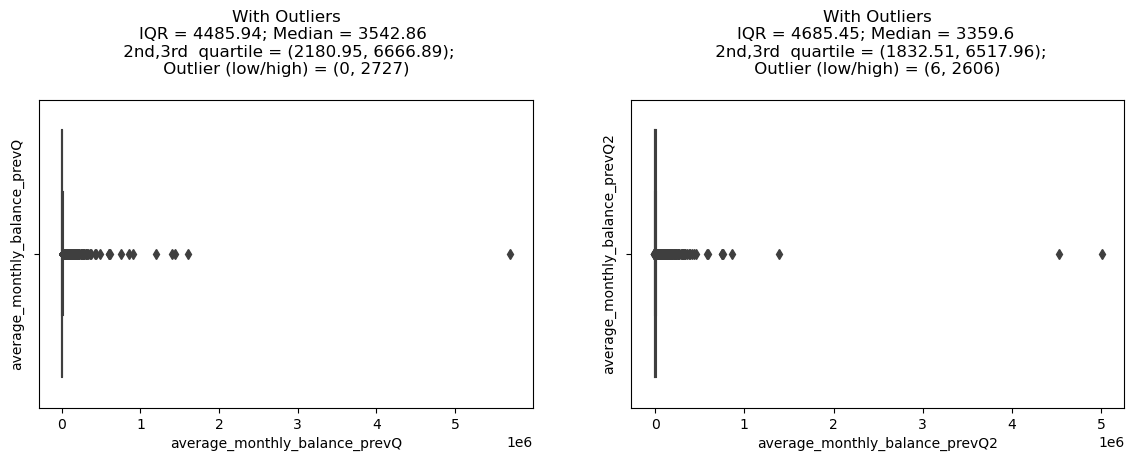

In [37]:
UVA_outlier(df,previous_quarters)

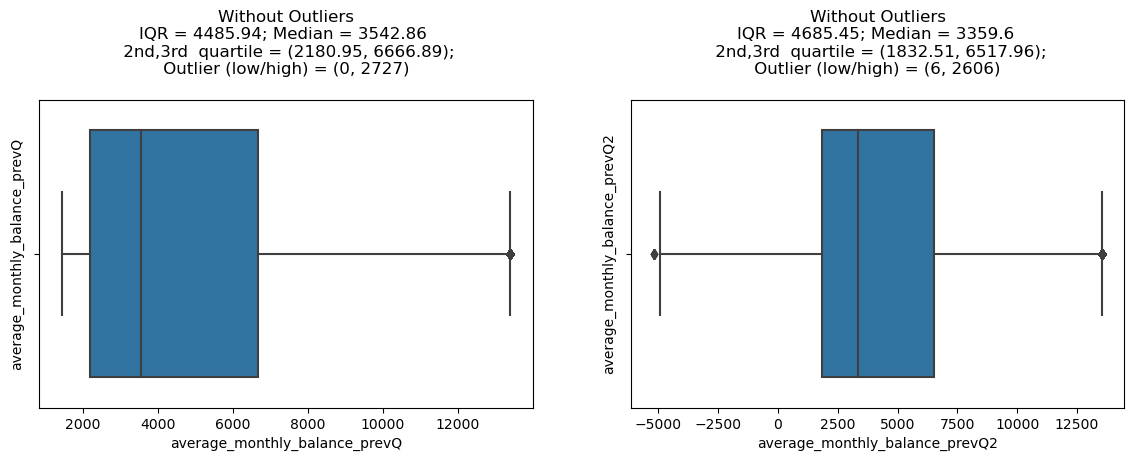

In [38]:
UVA_outlier(df,previous_quarters, include_outlier = False)


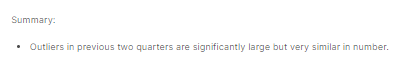

## 10. Summary of Univariate Analysis:

Investigation directions (for bivariate/multivariate)

1.customer_id variable can be dropped.

2.Is there there any common trait/relation between the customers who are performing high transaction credit/debits?
        a.customer_nw_category might explain that.
        b.Occupation = Company might explain them
        c.popular cities might explain this

3.Customers whose last transaction was 6 months ago, did all of them churn?

4.Possibility that cities and branch code with very few accounts may lead to churning.

Some Insights

1.Most of the customers lie in the Age between 30-66, but there is also significant customers who are very old(age>85)

2.Major bulk of the customers opened their account more than 4 years ago! (did customer signups detiorated in recent times?)

3.Major bulk of customers did their last transaction within last 100 days.

4.Majority of customers perform small scale transactions. But there are few who perform transactions of huge amounts, consistently.